In [69]:
import pandas as pd 


In [70]:
data = pd.read_csv(r"/home/ronodeep/thesisfinal-1/Cases_Meta_data.csv")

In [71]:
data.head()

,Case Number,CaseID,HPV,Adequacy,Reason,Squamocolumnar junction visibility,Transformation zone,Original squamous epithelium,Columnar epithelium,Metaplastic squamous epithelium,...,Additional miscellaneous finding,Aceto uptake,Margins,Vessels,Lesion size,Iodine uptake,SwedeFinal,\nProvisional diagnosis,Management,Histopathology
0,1,AAAW,Positive,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,Nabothian cysts,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Faintly or patchy yellow,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done
1,2,AADE,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy present,Crypt (gland) openings,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
2,3,AADG,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,Crypt (gland) openings,...,NaN,Nil or transparent,Nil or diffuse,Absent,< 5 mm,Brown,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
3,4,AAEG,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,NaN,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
4,5,AAER,Positive,Adequate,NaN,Completely visible,Type 2,Mature,NaN,NaN,...,NaN,Nil or transparent,Nil or diffuse,Absent,">15 mm, 3-4 quadrants, or endocervically undef...",Faintly or patchy yellow,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done


In [72]:
data = data.dropna(axis=1)

In [73]:
data.head()

,Case Number,CaseID,HPV,Adequacy,SwedeFinal,\nProvisional diagnosis,Management,Histopathology
0,1,AAAW,Positive,Adequate,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done
1,2,AADE,Negative,Adequate,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
2,3,AADG,Negative,Adequate,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
3,4,AAEG,Negative,Adequate,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
4,5,AAER,Positive,Adequate,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done


In [74]:
data = data.drop(columns=["Case Number"])

In [75]:
data.head()

,CaseID,HPV,Adequacy,SwedeFinal,\nProvisional diagnosis,Management,Histopathology
0,AAAW,Positive,Adequate,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done
1,AADE,Negative,Adequate,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
2,AADG,Negative,Adequate,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
3,AAEG,Negative,Adequate,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
4,AAER,Positive,Adequate,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done


In [76]:
# Find unique values in the 'status' column
unique_values = data['Histopathology'].unique()

# Print unique values
print(unique_values)

['Not done' 'Normal'
 'Tuberculosis of cervix with giant cells and granulation tissue'
 'LSIL-CIN1' 'HSIL-CIN2' 'HSIL-CIN3'
 'HSIL-CIN3; LSIL-CIN1 in the anterior lip'
 'Cervical histopathology was invasive squamous cell cancer, vaginal histopathology was HSIL-VAIN 3, and vulvar histopathology was HSIL-VIN 3'
 'Microinvasive squamous cell cancer' 'Invasive squamous cell carcinoma'
 'Microinvasive squamous cell carcinoma' 'Squamous cell carcinoma'
 'Adenocarcinoma in situ' 'Adenocarcinoma' 'Mucous polyp'
 'LSIL-HPV changes']


In [77]:
type(unique_values)

numpy.ndarray

In [78]:
import numpy as np

In [79]:
for i in unique_values:
    print(i, np.where(unique_values==i)[0][0])

Not done 0
Normal 1
Tuberculosis of cervix with giant cells and granulation tissue 2
LSIL-CIN1 3
HSIL-CIN2 4
HSIL-CIN3 5
HSIL-CIN3; LSIL-CIN1 in the anterior lip 6
Cervical histopathology was invasive squamous cell cancer, vaginal histopathology was HSIL-VAIN 3, and vulvar histopathology was HSIL-VIN 3 7
Microinvasive squamous cell cancer 8
Invasive squamous cell carcinoma 9
Microinvasive squamous cell carcinoma 10
Squamous cell carcinoma 11
Adenocarcinoma in situ 12
Adenocarcinoma 13
Mucous polyp 14
LSIL-HPV changes 15


In [80]:
data['Histopathology_numaric'] = data['Histopathology'].apply(lambda x: np.where(unique_values==x)[0][0])

In [81]:
data['HPV'] = data["HPV"].apply(lambda x: 1 if x=="Positive" else 0)

In [82]:
data['Adequacy'] = data["Adequacy"].apply(lambda x: 1 if x=="Adequate" else 0)

In [83]:
data.head()

,CaseID,HPV,Adequacy,SwedeFinal,\nProvisional diagnosis,Management,Histopathology,Histopathology_numaric
0,AAAW,1,1,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done,0
1,AADE,0,1,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done,0
2,AADG,0,1,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done,0
3,AAEG,0,1,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done,0
4,AAER,1,1,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done,0


In [84]:
data.iloc[29]

CaseID                                                                  AAFB
HPV                                                                        1
Adequacy                                                                   1
SwedeFinal                                                                99
\nProvisional diagnosis    Type 2 transformation zone; normal cervix with...
Management                 Considering the positive HPV test, punch biops...
Histopathology                                                        Normal
Histopathology_numaric                                                     1
Name: 29, dtype: object

In [85]:
u = data["Histopathology_numaric"].unique()
print(u)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [86]:
u_SwedeFinal = data["SwedeFinal"].unique()
print(u_SwedeFinal)

[ 1  0  4 99  3  2  5  6  9  7  8 10]


In [87]:
u_Adequacy = data["Adequacy"].unique()
print(u_Adequacy)

[1 0]


In [88]:
u_diagnosis = data["\nProvisional diagnosis"].unique()
print(u_diagnosis)

['Type 1 transformation zone; normal' 'Type 2 transformation zone; normal'
 'Type 3 transformation zone; normal'
 'Type 2 transformation zone; normal cervix with atrophic change'
 'Type 3 transformation zone; normal cervix with atrophic change'
 'Type 1 transformation zone; normal with pregnancy-induced changes'
 'Type 1 transformation zone; normal with ectropion'
 'Type 1 transformation zone; low-grade Squamous intraepithelial lesion (LSIL) with ectropion'
 'Type 1 transformation zone; low-grade squamous intraepithelial lesion (LSIL)'
 'Type1 transformation zone; normal with ectropion'
 'Type 1 transformation zone; normal with evidence of candida infection'
 'Type 1 transformation zone; normal with evidence of trichomoniasis'
 'Type 1 transformation zone; normal with evidence of <i>Trichomonas vaginalis</i>'
 'Type 1 transformation zone; cervicitis'
 'Inadequate colposcopy due to severe vaginal infection'
 'Tuberculosis ulcer of cervix' 'Tuberculosis ulcer of cervix healed'
 'Type 1 t

In [89]:
print(len(u_diagnosis))

58


In [90]:
data.shape

(200, 8)

In [91]:
import pandas as pd
import networkx as nx


# Initialize Graph
csv_G = nx.Graph()

# Add nodes (each CaseID is a node)
for _, row in data.iterrows():
    csv_G.add_node(row["CaseID"], 
                HPV=row["HPV"], 
                Adequacy=row["Adequacy"], 
                SwedeFinal=row["SwedeFinal"], 
                Provisional_Diagnosis=row["\nProvisional diagnosis"], 
                Management=row["Management"], 
                Histopathology=row["Histopathology"], 
                Histopathology_num=row["Histopathology_numaric"])

# Add edges based on medical attributes (patients with same diagnosis, HPV status, etc.)
for i, row1 in data.iterrows():
    for j, row2 in data.iterrows():
        if i < j:
            if row1["HPV"] == row2["HPV"] or row1["Management"] == row2["Management"]:
                csv_G.add_edge(row1["CaseID"], row2["CaseID"], label="same_condition")

# Save CSV Graph
nx.write_gml(csv_G, "csv_graph.gml")
print(f"CSV Graph: {csv_G.number_of_nodes()} nodes, {csv_G.number_of_edges()} edges")

CSV Graph: 200 nodes, 10091 edges


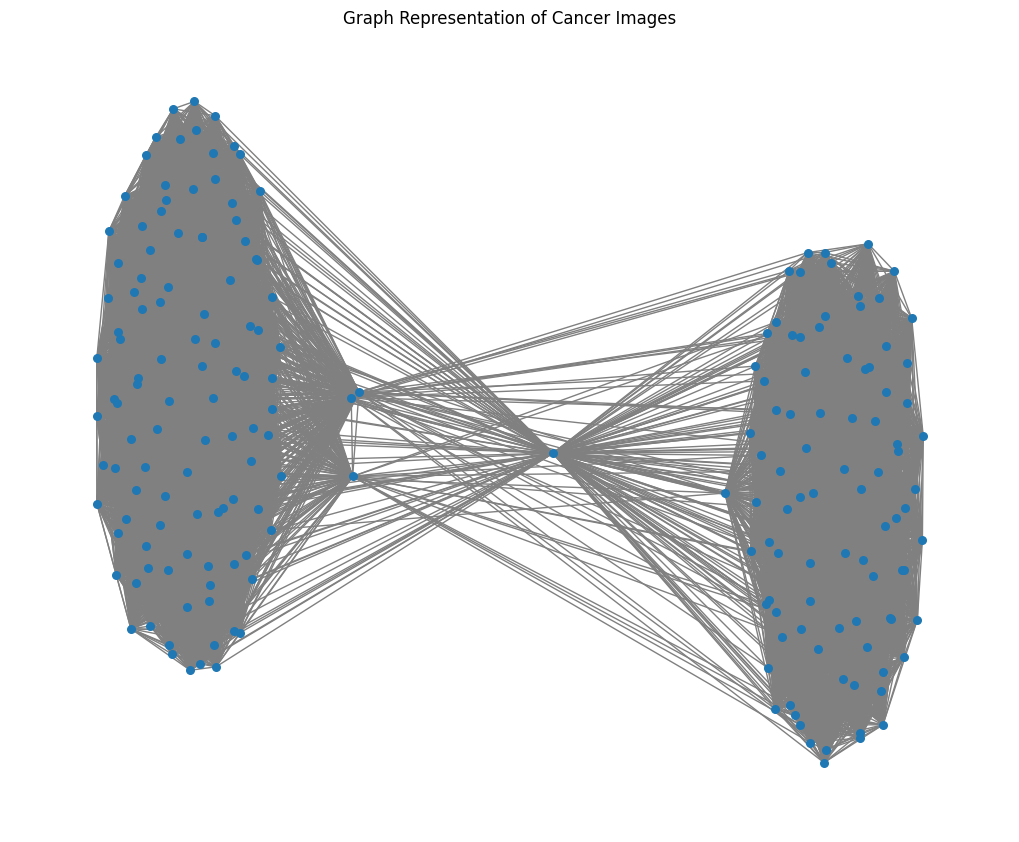

In [92]:
# Visualize Graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(csv_G)
nx.draw(csv_G, pos, with_labels=False, node_size=30, edge_color="gray")
plt.title("Graph Representation of Cancer Images")
plt.show()

Visualizing Graph for CaseID: AAFB


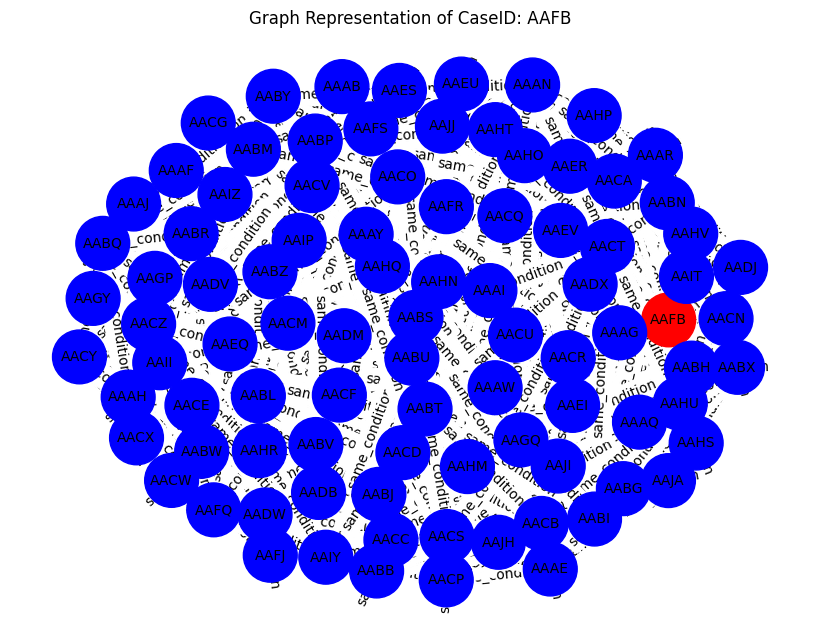

In [93]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV graph
csv_G = nx.read_gml("csv_graph.gml")

# Select the first CaseID node
first_case_id = list(csv_G.nodes)[29]  # Get first CaseID
print(f"Visualizing Graph for CaseID: {first_case_id}")

# Extract subgraph (first CaseID and its connected nodes)
subgraph_nodes = list(csv_G.neighbors(first_case_id)) + [first_case_id]
subgraph = csv_G.subgraph(subgraph_nodes)

# Visualize the subgraph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph)  # Node positioning

# Assign colors (Red for CaseID, Blue for attributes)
colors = ["red" if n == first_case_id else "blue" for n in subgraph.nodes]

# Draw graph
nx.draw(subgraph, pos, with_labels=True, node_color=colors, edge_color="gray", node_size=1500, font_size=10)

# Draw edge labels
edge_labels = {(u, v): subgraph[u][v]["label"] for u, v in subgraph.edges()}
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

plt.title(f"Graph Representation of CaseID: {first_case_id}")
plt.show()

In [94]:
import networkx as nx

# Load the CSV graph
csv_G = nx.read_gml("csv_graph.gml")

# Choose a specific CaseID (replace with any valid node)
case_id = "AAAW"  # Example CaseID

# Check if the node exists
if case_id in csv_G.nodes:
    # Get node attributes (Case metadata)
    case_info = csv_G.nodes[case_id]
   
    # Get all connected nodes (relationships)
    connected_nodes = list(csv_G.neighbors(case_id))
   
    # Get edge labels (relationships with connected nodes)
    edge_labels = {neighbor: csv_G[case_id][neighbor]["label"] for neighbor in connected_nodes}

    # Print case info
    print(f"Case ID: {case_id}")
    print(f"Attributes: {case_info}")
    print(f"Connected Nodes: {connected_nodes}")
    print(f"Edge Labels: {edge_labels}")
else:
    print(f"CaseID {case_id} not found in the graph.")

Case ID: AAAW
Attributes: {'HPV': 1, 'Adequacy': 1, 'SwedeFinal': 1, 'Provisional_Diagnosis': 'Type 1 transformation zone; normal', 'Management': 'Repeat HPV test/colposcopy after 1 year', 'Histopathology': 'Not done', 'Histopathology_num': 0}
Connected Nodes: ['AAER', 'AAHV', 'AAIP', 'AAHM', 'AAFB', 'AAAJ', 'AAIT', 'AAFJ', 'AAII', 'AAJH', 'AABB', 'AAAY', 'AAHN', 'AACG', 'AAGY', 'AABH', 'AABI', 'AABJ', 'AABL', 'AACD', 'AAHP', 'AAHQ', 'AACA', 'AAJI', 'AABU', 'AABP', 'AABN', 'AABV', 'AABX', 'AACZ', 'AAHO', 'AAHR', 'AAHS', 'AAJJ', 'AABM', 'AABR', 'AABS', 'AABT', 'AACF', 'AACR', 'AACW', 'AAES', 'AAAN', 'AABG', 'AACM', 'AACO', 'AACT', 'AABQ', 'AACB', 'AACC', 'AACN', 'AACU', 'AACY', 'AAHT', 'AAHU', 'AACE', 'AAEV', 'AACV', 'AABY', 'AADX', 'AAFS', 'AAIZ', 'AADV', 'AABZ', 'AACP', 'AACQ', 'AACS', 'AADB', 'AADW', 'AAAQ', 'AAAR', 'AABW', 'AAEI', 'AAEU', 'AAFQ', 'AAFR', 'AAJA', 'AAEQ', 'AAAE', 'AAAF', 'AAAG', 'AAAH', 'AAAI', 'AADJ', 'AADM', 'AAAB', 'AAGQ', 'AAGP', 'AACX', 'AAIY']
Edge Labels: {'AAE

In [95]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import models, transforms
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define image folder path
image_folder = r"/home/ronodeep/thesisfinal-1/IARCImageBankColpo"

# Define CNN model (ResNet for feature extraction)
model = models.resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
model.eval()

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dictionaries to store image features and case-to-image mapping
image_features = {}
case_to_images = {}

# Valid image extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# Load images from folders
for case_id in sorted(os.listdir(image_folder)):
    case_path = os.path.join(image_folder, case_id)
    if os.path.isdir(case_path):
        print(f"Processing {case_id}...")
       
        # Initialize case_id key in case_to_images
        case_to_images[case_id] = []
       
        for img_file in os.listdir(case_path):
            # Skip non-image files and Zone.Identifier files
            file_ext = os.path.splitext(img_file)[1].lower()
            if file_ext not in valid_extensions or "Zone.Identifier" in img_file:
                continue
               
            img_path = os.path.join(case_path, img_file)
            try:
                # Try using PIL directly instead of OpenCV
                img_pil = Image.open(img_path).convert('RGB')
               
                # Apply transformation
                img_transformed = transform(img_pil)
                img_transformed = img_transformed.unsqueeze(0)  # Add batch dimension

                with torch.no_grad():
                    feature = model(img_transformed).squeeze().numpy()  # Extract features

                # Store image features
                image_features[img_path] = feature
               
                # Store mapping of case_id to images
                case_to_images[case_id].append(img_path)
               
                print(f"  Processed: {img_file}")
               
            except Exception as e:
                print(f"  Error processing {img_file}: {str(e)}")
                continue

print(f"Total features extracted: {len(image_features)}")
print(f"Total cases mapped: {len(case_to_images)}")

# Print a sample case with its images
sample_case = list(case_to_images.keys())[0]
print(f"Sample CaseID: {sample_case}")
print(f"Images under {sample_case}: {case_to_images[sample_case]}")

from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between image feature vectors
image_paths = list(image_features.keys())
features = np.array(list(image_features.values()))
similarity_matrix = cosine_similarity(features)

# Define similarity threshold
threshold = 0.8

# Add edges based on similarity
for i in range(len(image_paths)):
    for j in range(i + 1, len(image_paths)):
        similarity = similarity_matrix[i, j]
        image_graph.add_edge(image_paths[i], image_paths[j], weight=str(similarity))  # Convert similarity to string

# Save Image Graph
nx.write_gml(image_graph, "image_graph.gml")

print(f"Image Graph: {image_graph.number_of_nodes()} nodes, {image_graph.number_of_edges()} edges")

Processing Case 001...
  Processed: AAAW3.jpg
  Processed: AAAW2.jpg
  Processed: AAAW1.jpg
  Processed: AAAW4.jpg
Processing Case 002...
  Processed: AADE4.jpg
  Processed: AADE0.jpg
  Processed: AADE3.jpg
  Processed: AADE1.jpg
Processing Case 003...
  Processed: AADG0.jpg
  Processed: AADG1.jpg
  Processed: AADG2.jpg
  Processed: AADG3.jpg
Processing Case 004...
  Processed: AAEG0.jpg
  Processed: AAEG1.jpg
  Processed: AAEG2.jpg
Processing Case 005...
  Processed: AAER2.jpg
  Processed: AAER1.jpg
  Processed: AAER0.jpg
  Processed: AAER3.jpg
Processing Case 006...
  Processed: AAFU3.jpg
  Processed: AAFU0.jpg
  Processed: AAFU1.jpg
  Processed: AAFU2.jpg
  Processed: AAFU4.jpg
Processing Case 007...
  Processed: AAFY1.jpg
  Processed: AAFY4.jpg
  Processed: AAFY3.jpg
  Processed: AAFY0.jpg
Processing Case 008...
  Processed: AAFZ0.jpg
  Processed: AAFZ4.jpg
  Processed: AAFZ5.jpg
  Processed: AAFZ2.jpg
Processing Case 009...
  Processed: AAGB1.jpg
  Processed: AAGB0.jpg
  Processed

NameError: name 'image_graph' is not defined

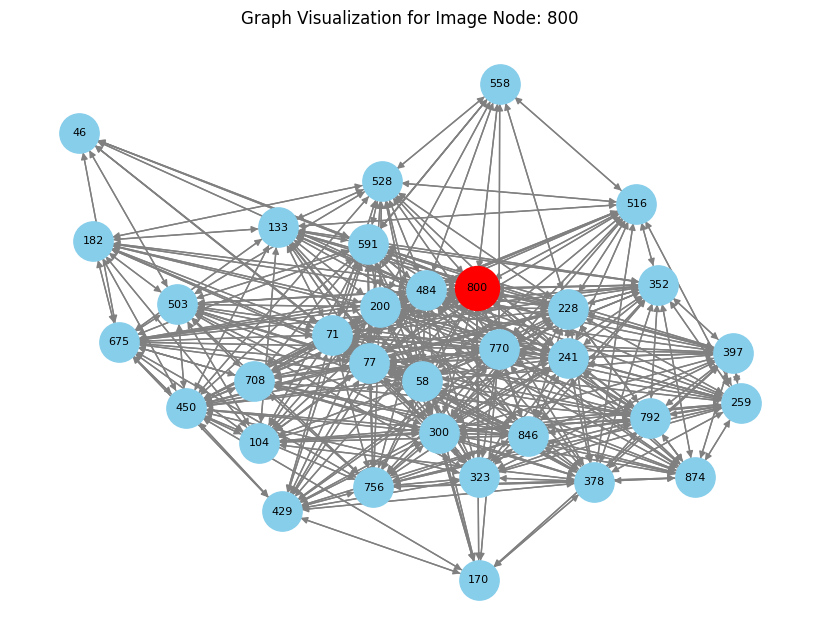

In [96]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx


# Open the .gml file with the 'ISO-8859-1' encoding
graph_file = torch.load("cancer_graph_dataset.gml",weights_only=False)
G = to_networkx(graph_file)

# Select a random node (image) or the first image node
sample_node = list(G.nodes)[800]  # First node in the graph

# Get neighbors of the selected node (images similar to the sample)
neighbors = list(G.neighbors(sample_node))

# Create a subgraph for visualization
subG = G.subgraph([sample_node] + neighbors)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subG)  # Node positioning
nx.draw(subG, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=800, font_size=8)

# Highlight the main image node in red
nx.draw_networkx_nodes(subG, pos, nodelist=[sample_node], node_color="red", node_size=1000)

plt.title(f"Graph Visualization for Image Node: {sample_node}")
plt.show()

In [ ]:
#%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [97]:
# Load CSV and Image Graphs
csv_G = nx.read_gml("csv_graph.gml")
image_G = nx.read_gml("image_graph.gml")

# Create a new merged graph
merged_G = nx.Graph()
merged_G.add_nodes_from(csv_G.nodes(data=True))  # Add CSV nodes
merged_G.add_nodes_from(image_G.nodes(data=True))  # Add Image nodes
merged_G.add_edges_from(csv_G.edges(data=True))  # Add CSV edges
merged_G.add_edges_from(image_G.edges(data=True))  # Add Image edges

# Connect CSV nodes to corresponding Image nodes
for case_id, images in case_to_images.items():
    if case_id in csv_G.nodes:
        for img in images:
            merged_G.add_edge(case_id, img, label="belongs_to_case")

# Save Merged Graph
nx.write_gml(merged_G, "merged_graph.gml")
print(f"Merged Graph: {merged_G.number_of_nodes()} nodes, {merged_G.number_of_edges()} edges")

Merged Graph: 1113 nodes, 426419 edges


In [98]:
# Load the merged graph
merged_G = nx.read_gml(r"/home/ronodeep/thesisfinal-1/merged_graph.gml")

# Print graph details
print(f"Total Nodes: {merged_G.number_of_nodes()}, Total Edges: {merged_G.number_of_edges()}\n")

# Extract only CaseID nodes (assuming they have type "Case")
case_nodes = [n for n, d in merged_G.nodes(data=True) if d.get("type") == "Case"]

# Print metadata for first 5 cases
print("Sample Case Metadata:")
for case in case_nodes[:5]:  # View first 5 cases
    data = merged_G.nodes[case]
    print(f"CaseID: {case}")
    print(f"  HPV: {data.get('HPV', 'N/A')}")
    print(f"  Histopathology: {data.get('Histopathology', 'N/A')}")
    print(f"  SwedeFinal: {data.get('SwedeFinal', 'N/A')}")
    print("-" * 40)

# View metadata for a specific CaseID
case_id = "AAAW"  # Change as needed
print(f"\nMetadata for CaseID: {case_id}")
if case_id in merged_G:
    case_data = merged_G.nodes[case_id]
    print(f"  HPV: {case_data.get('HPV', 'N/A')}")
    print(f"  Histopathology: {case_data.get('Histopathology', 'N/A')}")
    print(f"  SwedeFinal: {case_data.get('SwedeFinal', 'N/A')}")
else:
    print(f"CaseID {case_id} not found in graph.")

Total Nodes: 1113, Total Edges: 426419

Sample Case Metadata:

Metadata for CaseID: AAAW
  HPV: 1
  Histopathology: Not done
  SwedeFinal: 1


In [99]:
import networkx as nx
import torch
from sklearn.model_selection import train_test_split
import torch_geometric.utils as pyg_utils

# Load the merged graph from GML file
merged_G = nx.read_gml(r"/home/ronodeep/thesisfinal-1/merged_graph.gml")

# Extract nodes and labels
case_nodes = list(merged_G.nodes())
case_labels = [merged_G.nodes[n].get("Histopathology_num", 0) for n in case_nodes]

In [100]:
len(case_nodes)

1113

In [101]:
len(case_labels)

1113

In [102]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'case_nodes' is your list of samples and 'case_labels' is the corresponding list of labels

# Filter classes with at least two instances
unique, counts = np.unique(case_labels, return_counts=True)
valid_classes = unique[counts >= 2]
valid_indices = [i for i, label in enumerate(case_labels) if label in valid_classes]

valid_case_nodes = [case_nodes[i] for i in valid_indices]
valid_case_labels = [case_labels[i] for i in valid_indices]

# Train-Test Split (85% Train, 15% Test)
train_cases, test_cases = train_test_split(valid_case_nodes, test_size=0.15, stratify=valid_case_labels, random_state=42)

# Extract labels for the training set for further stratification
train_labels = [valid_case_labels[i] for i in range(len(valid_case_labels)) if valid_case_nodes[i] in train_cases]

# Train-Validation Split (from remaining 85%)
train_cases, val_cases = train_test_split(train_cases, test_size=0.176, stratify=train_labels, random_state=42)

In [103]:
print(len(train_cases))
print(len(val_cases))
print(len(test_cases))

775
166
167
